In [2]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 24.5 MB/s 
     |████████████████████████████████| 9.8 MB 41.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [4]:
from google.colab import files
upload = files.upload()

Saving pocm.csv to pocm.csv


In [198]:
data = pd.read_csv("pocm.csv", parse_dates=True)
data.drop("Unnamed: 0", axis=1, inplace=True)
data.columns = ["Date", "Quantity"]
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
data.head()

,Quantity
Date,
2018-12-04,1
2018-12-04,1
2018-12-05,5
2018-12-05,10
2018-12-05,20


In [7]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
  result = adfuller(dataset, autolag="AIC")
  print(f"ad_test: {result[0]}\np-value: {result[1]}")
  for x,y in result[4].items():
    print(f"critical value: {x}:{y}")


In [8]:
ad_test(data)

ad_test: -38.97367420770713
p-value: 0.0
critical value: 1%:-3.4303907429384073
critical value: 5%:-2.861558007815263
critical value: 10%:-2.566779584916894


In [199]:
data = data.resample("D").mean().dropna()

In [10]:
ad_test(data["Quantity"])

ad_test: -6.857287940706896
p-value: 1.636116141816501e-09
critical value: 1%:-3.4445220811896657
critical value: 5%:-2.8677891615873192
critical value: 10%:-2.5700985643950656


In [115]:
from pmdarima import auto_arima
step_wise = auto_arima(np.log(data["Quantity"]), trace=True, suppress_warnings=True)
step_wise.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1341.820, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1226.598, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1339.841, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1161.043, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1141.485, Time=0.14 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1133.061, Time=0.17 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1086.916, Time=0.23 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=1062.449, Time=0.67 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1060.464, Time=0.35 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1060.032, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  470
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -525.213
Date:                Tue, 08 Feb 2022   AIC                           1054.427
Time:                        19:55:26   BIC                           1062.728
Sample:                             0   HQIC                          1057.693
                                - 470                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9715      0.012    -82.038      0.000      -0.995      -0.948
sigma2         0.5464      0.024     22.399      0.000       0.499       0.594
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):               164.36
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                            -0.93
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [200]:
train = np.log(data[:"2020-05-01"])
test = np.log(data["2020-05-01":])
test

,Quantity
Date,
2020-05-01,2.215352
2020-05-04,2.805575
2020-05-05,2.970984
2020-05-06,2.615324
2020-05-07,1.912574
2020-05-08,2.548219
2020-05-11,2.044062
2020-05-12,4.043943
2020-05-13,2.013897


In [201]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train["Quantity"], order=(5,0,3))
model = model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Quantity   No. Observations:                  460
Model:                 ARIMA(5, 0, 3)   Log Likelihood                -505.388
Date:                Tue, 08 Feb 2022   AIC                           1030.775
Time:                        20:11:14   BIC                           1072.088
Sample:                             0   HQIC                          1047.043
                                - 460                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1819      0.116     18.729      0.000       1.954       2.410
ar.L1          0.0162      0.202      0.080      0.936      -0.380       0.412
ar.L2          0.1465      0.210      0.699      0.485      -0.264       0.557
ar.L3          0.7837      0.148      5.278      0.000       0.493       1.075
ar.L4          0.0261      0.076      0.346      0.730      -0.122       0.174
ar.L5         -0.0369      0.077     -0.478      0.633      -0.188       0.114
ma.L1          0.0399      0.200      0.199      0.842      -0.352       0.432
ma.L2         -0.1487      0.197     -0.755      0.450      -0.535       0.237
ma.L3         -0.6951      0.151     -4.599      0.000      -0.991      -0.399
sigma2         0.5265      0.030     17.717      0.000       0.468       0.585
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               181.07
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -1.04
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [202]:
#predictios
start = len(train)
stop = len(test) + len(train)-1
pred = model.predict(start=start, end=stop)
pred.index = data.index[start-1:stop]
pred

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Date
2020-05-01    1.584288
2020-05-04    1.956669
2020-05-05    1.950576
2020-05-06    1.676066
2020-05-07    1.946471
2020-05-08    1.938863
2020-05-11    1.749310
2020-05-12    1.950107
2020-05-13    1.936818
2020-05-14    1.807283
2020-05-15    1.955941
Name: predicted_mean, dtype: float64

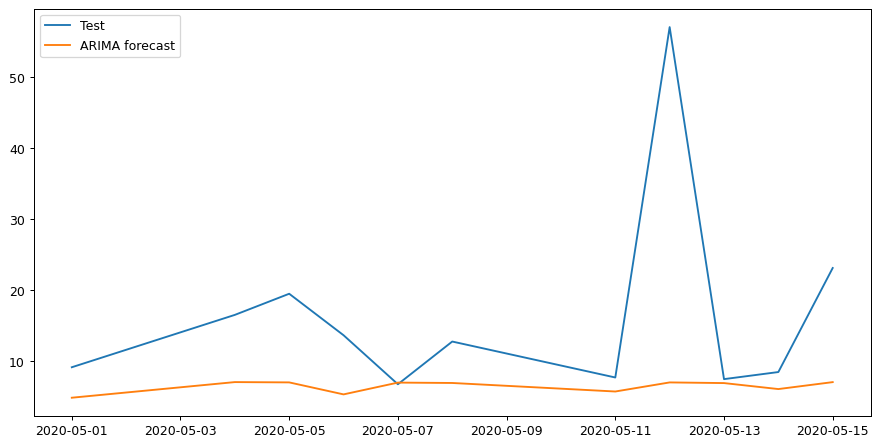

In [203]:
test["Quantity"] = np.exp(test["Quantity"])
pred = np.exp(pred)
plt.figure(figsize=(12,6),dpi=90)
plt.plot(test['Quantity'], label="Test")
plt.plot(pred, label="ARIMA forecast")
plt.legend(loc="upper left")
plt.show()

In [204]:
pred

Date
2020-05-01    4.875819
2020-05-04    7.075719
2020-05-05    7.032737
2020-05-06    5.344488
2020-05-07    7.003924
2020-05-08    6.950840
2020-05-11    5.750632
2020-05-12    7.029439
2020-05-13    6.936642
2020-05-14    6.093867
2020-05-15    7.070567
Name: predicted_mean, dtype: float64

In [82]:
smodel = auto_arima(train["Quantity"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.64 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1281.171, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1169.682, Time=0.66 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.29 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1279.313, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1283.128, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1132.420, Time=1.49 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.51 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.67 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1131.054, Time=1.54 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1168.823, Time=0.47 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=6.13 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.22 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=1132.406, Time=1.36 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=1134.3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  460
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                -562.096
Date:                  Tue, 08 Feb 2022   AIC                           1130.192
Time:                          19:24:05   BIC                           1142.506
Sample:                               0   HQIC                          1135.046
                                  - 460                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6244      0.039    -16.175      0.000      -0.700      -0.549
ar.S.L24      -0.2976      0.044     -6.793      0.000      -0.383      -0.212
sigma2         0.7114      0.037     19.350      0.000       0.639       0.783
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):                64.42
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                            -0.65
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
n_periods = 11
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)


In [85]:
fitted

array([0.55350578, 1.79675018, 1.98148265, 1.50322673, 2.22969752,
       1.5981303 , 0.76816592, 2.79753356, 1.58170315, 1.10908011,
       1.99637756])

In [87]:
fitted = pd.Series(fitted)
fitted.index = data.index[len(train)-1:len(train)+len(test)+1]
fitted

Date
2020-05-01    0.553506
2020-05-04    1.796750
2020-05-05    1.981483
2020-05-06    1.503227
2020-05-07    2.229698
2020-05-08    1.598130
2020-05-11    0.768166
2020-05-12    2.797534
2020-05-13    1.581703
2020-05-14    1.109080
2020-05-15    1.996378
dtype: float64

In [89]:
test["Quantity"] = np.exp(test["Quantity"])
fitted = np.exp(fitted)

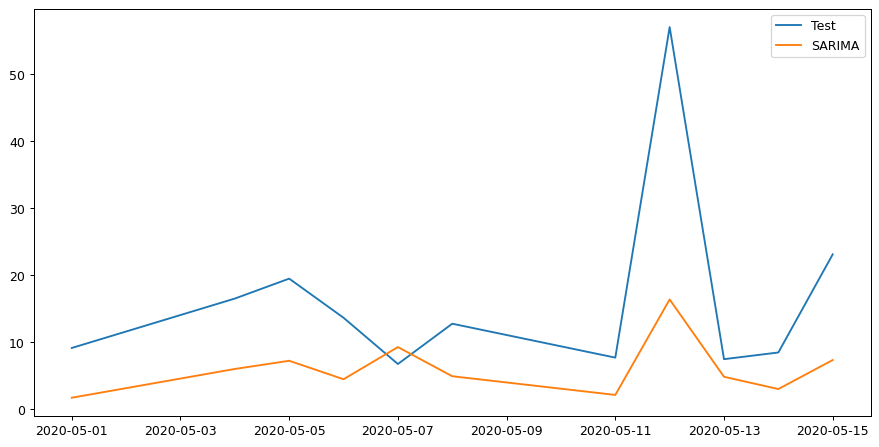

In [90]:
plt.figure(figsize=(12,6),dpi=90)
plt.plot(test["Quantity"], label="Test")
plt.plot(fitted, label="SARIMA")
plt.legend(loc="best")
plt.show()

In [92]:
up = files.upload()

Saving prediction2.csv to prediction2.csv


In [93]:
predfile = pd.read_csv("prediction2.csv")
predfile

,Unnamed: 0,Date,Actual values,Forecast,SES,Holt's Linear,Holt's winter
0,0,2020-05-01,9.164634,6.180194,9.114054,8.752149,2.711485
1,1,2020-05-04,16.536585,4.003497,9.114054,9.262296,8.958970
2,2,2020-05-05,19.511111,8.232752,9.114054,9.802179,3.457510
3,3,2020-05-06,13.671642,6.118940,9.114054,10.373531,2.410097
4,4,2020-05-07,6.770492,8.076978,9.114054,10.978185,4.650369
5,5,2020-05-08,12.784314,9.072763,9.114054,11.618084,4.297632
6,6,2020-05-11,7.721910,9.862080,9.114054,12.295281,3.443809
7,7,2020-05-12,57.050847,7.385135,9.114054,13.011952,5.104703
8,8,2020-05-13,7.492462,7.094786,9.114054,13.770395,4.395288
9,9,2020-05-14,8.490397,7.783495,9.114054,14.573047,2.421780


In [94]:
predfile["SARIMA"] = [i for i in fitted]
predfile

,Unnamed: 0,Date,Actual values,Forecast,SES,Holt's Linear,Holt's winter,SARIMA
0,0,2020-05-01,9.164634,6.180194,9.114054,8.752149,2.711485,1.739340
1,1,2020-05-04,16.536585,4.003497,9.114054,9.262296,8.958970,6.030019
2,2,2020-05-05,19.511111,8.232752,9.114054,9.802179,3.457510,7.253489
3,3,2020-05-06,13.671642,6.118940,9.114054,10.373531,2.410097,4.496174
4,4,2020-05-07,6.770492,8.076978,9.114054,10.978185,4.650369,9.297053
5,5,2020-05-08,12.784314,9.072763,9.114054,11.618084,4.297632,4.943780
6,6,2020-05-11,7.721910,9.862080,9.114054,12.295281,3.443809,2.155809
7,7,2020-05-12,57.050847,7.385135,9.114054,13.011952,5.104703,16.404137
8,8,2020-05-13,7.492462,7.094786,9.114054,13.770395,4.395288,4.863232
9,9,2020-05-14,8.490397,7.783495,9.114054,14.573047,2.421780,3.031568


In [205]:
predfile["ARIMA"] = [i for i in pred]
predfile

,Unnamed: 0,Date,Actual values,Forecast,SES,Holt's Linear,Holt's winter,SARIMA,ARIMA
0,0,2020-05-01,9.164634,6.180194,9.114054,8.752149,2.711485,1.739340,4.875819
1,1,2020-05-04,16.536585,4.003497,9.114054,9.262296,8.958970,6.030019,7.075719
2,2,2020-05-05,19.511111,8.232752,9.114054,9.802179,3.457510,7.253489,7.032737
3,3,2020-05-06,13.671642,6.118940,9.114054,10.373531,2.410097,4.496174,5.344488
4,4,2020-05-07,6.770492,8.076978,9.114054,10.978185,4.650369,9.297053,7.003924
5,5,2020-05-08,12.784314,9.072763,9.114054,11.618084,4.297632,4.943780,6.950840
6,6,2020-05-11,7.721910,9.862080,9.114054,12.295281,3.443809,2.155809,5.750632
7,7,2020-05-12,57.050847,7.385135,9.114054,13.011952,5.104703,16.404137,7.029439
8,8,2020-05-13,7.492462,7.094786,9.114054,13.770395,4.395288,4.863232,6.936642
9,9,2020-05-14,8.490397,7.783495,9.114054,14.573047,2.421780,3.031568,6.093867


In [206]:
predfile.to_csv("prediction2.csv")
files.download("prediction2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>